In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d anikannal/solar-power-generation-data
!unzip solar-power-generation-data.zip

Dataset URL: https://www.kaggle.com/datasets/anikannal/solar-power-generation-data
License(s): copyright-authors
  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 146MB/s]
Archive:  solar-power-generation-data.zip
  inflating: Plant_1_Generation_Data.csv  
  inflating: Plant_1_Weather_Sensor_Data.csv  
  inflating: Plant_2_Generation_Data.csv  
  inflating: Plant_2_Weather_Sensor_Data.csv  


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('Plant_1_Generation_Data.csv')
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])
data = data.sort_values('DATE_TIME')
print(data.head())

    DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0  2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
20 2020-05-15   4135001  zVJPv84UY57bAof       0.0       0.0          0.0   
19 2020-05-15   4135001  zBIq5rxdHJRwDNY       0.0       0.0          0.0   
18 2020-05-15   4135001  z9Y9gH1T5YWrNuG       0.0       0.0          0.0   
17 2020-05-15   4135001  wCURE6d3bPkepu2       0.0       0.0          0.0   

    TOTAL_YIELD  
0     6259559.0  
20    7116151.0  
19    6339380.0  
18    7007866.0  
17    6782598.0  


<ipython-input-5-0122361deef6>:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])


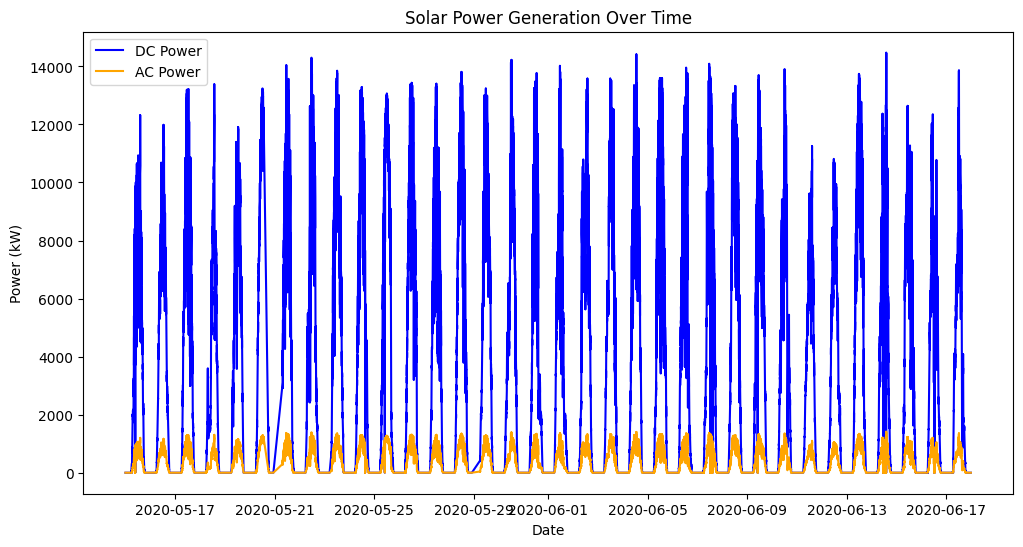

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['DATE_TIME'], data['DC_POWER'], label='DC Power', color='blue')
plt.plot(data['DATE_TIME'], data['AC_POWER'], label='AC Power', color='orange')
plt.title('Solar Power Generation Over Time')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler


target = data['AC_POWER'].values.reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler.fit_transform(target)


def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(scaled_target, time_steps)


X = X.reshape(X.shape[0], X.shape[1], 1)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - loss: 0.0057 - val_loss: 0.0018
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 12

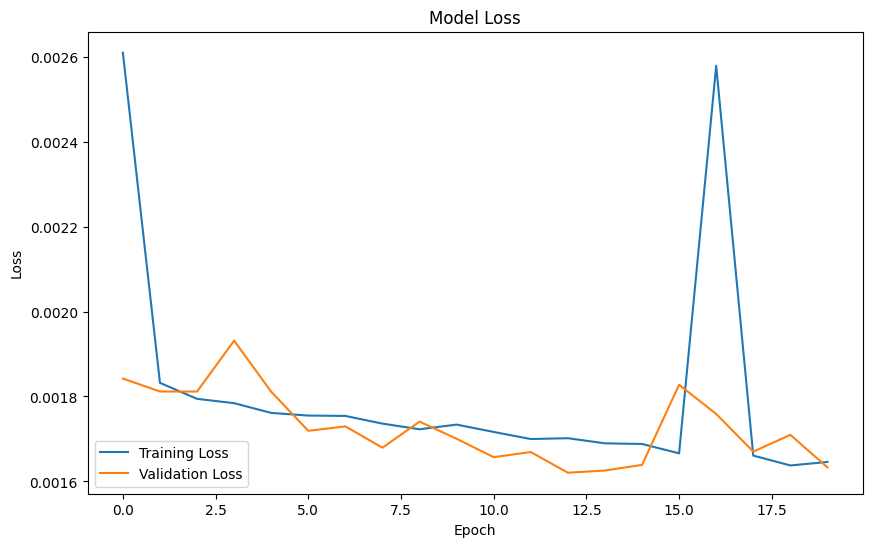

In [ ]:

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


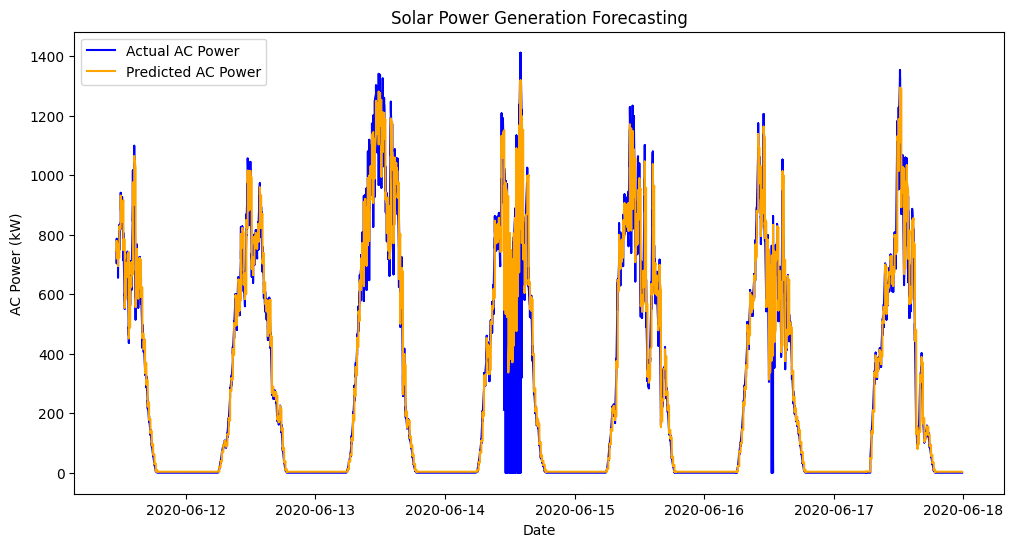

In [ ]:

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(12, 6))
plt.plot(data['DATE_TIME'][-len(y_test):], y_test_orig, label='Actual AC Power', color='blue')
plt.plot(data['DATE_TIME'][-len(y_test):], predictions, label='Predicted AC Power', color='orange')
plt.title('Solar Power Generation Forecasting')
plt.xlabel('Date')
plt.ylabel('AC Power (kW)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test_orig, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 57.01999739703474
